<a href="https://colab.research.google.com/github/mdzakyjaya/MLAZK/blob/main/MLAZK_P2_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression

In [ ]:
# load data
import pandas as pd

link = "https://raw.githubusercontent.com/mdzakyjaya/MLAZK/main/Data/P3/Salary_Data.csv"
df = pd.read_csv(link)

# define features and label
x = df.iloc[:, :1].values
y = df.iloc[:, 1:].values

# split to train and test
from sklearn.model_selection import train_test_split as tt

x_train, x_test, y_train, y_test = tt(x, y, test_size=0.3, random_state=123)

# create slr model
from sklearn.linear_model import LinearRegression as lr

model = lr()

# train the model
model.fit(x_train, y_train)

# test the model
model.predict(x_test)

print(model.score(x_test, y_test))
print(model.score(x_train, y_train))
print(model.score(x, y))

0.963407053878536
0.9518686093824901
0.9566181589200135


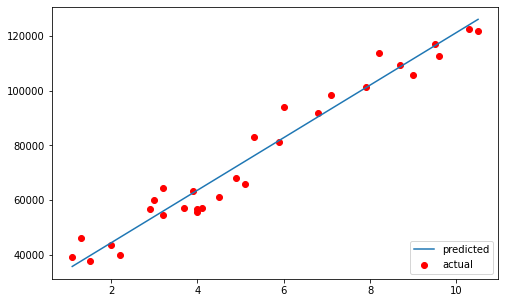

In [ ]:
# visualize the model
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(x, y, label="actual", c="red")
plt.plot(x, model.predict(x), label="predicted")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# how to predict a single experience?
import numpy as np

def angka(i):
    return np.array(i).reshape(1, -1)

model.predict(angka(12))

# or simply
model.predict([[12]])

# how to write down the model?
print("model\nsallary = {} + {}(experience)"
      .format(round(model.intercept_[0], 2),
              round(model.coef_.flatten()[0], 2)))

model
sallary = 25235.62 + 9602.56(experience)


# Multiple Linear Regression

assumption of MLR
1. Linearity
2. Homoscedastisity
3. Multivariate normal distributed
4. independence of errors
5. lack of multicolinearity

In [ ]:
# load the data
import pandas as pd

url = "https://raw.githubusercontent.com/mdzakyjaya/MLAZK/main/Data/P3/50_Startups.csv"
df = pd.read_csv(url)

# explore the data
df.info()

# define dependent & independent variable
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# encoding categorical data
# create dummy variables for state with base "california"
dummy_state = pd.get_dummies(df.State, drop_first=True, 
                             prefix='State_')

# input the dummy variables to the dataframe
# df = pd.concat((df.drop('State', axis=1), dummy_state), axis=1)

# or use one-hot encoding
from sklearn.preprocessing import OneHotEncoder as OH
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers=[('encoder', OH(),
                                      [-1])], 
                       remainder='passthrough')

x = ct.fit_transform(x)

# split to train n test
from sklearn.model_selection import train_test_split as tt

x_train, x_test, y_train, y_test = tt(x, y, test_size=0.3, random_state=2)

# create model
from sklearn.linear_model import LinearRegression as lm

# train the model
model = lm()
model.fit(x_train, y_train)

# test model
y_predict = model.predict(x_test)


# a little trick to display actual and predicted values for dependent var 
import numpy as np
np.set_printoptions(precision=2)

pd.DataFrame({"actual": y_test.tolist(), 
              "predicted": model.predict(x_test).tolist()})

np.concatenate((y_test.reshape(-1, 1), y_predict.reshape(-1,1)), axis=1)

6